## $$Session-13-Assignment-1$$

Predicting Survival in the Titanic Data Set:
    
We will be using a decision tree to make predictions about the Titanic data set from Kaggle. This data set provides 
information on the Titanic passengers and can be used to predict whether a passenger survived or not.

Loading Data and modules<br>
import numpy as np<br>
import pandas as pd<br>
import seaborn as sb<br>
import matplotlib.pyplot as plt<br>
import sklearn<br>
from pandas import Series, DataFrame<br>
from pylab import rcParams<br>
from sklearn import preprocessing<br>
from sklearn.linear_model import LogisticRegression<br>
from sklearn.cross_validation import train_test_split<br>
from sklearn import metrics<br>
from sklearn.metrics import classification_report<br>
Url= https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv<br>
titanic = pd.read_csv(url)<br>
titanic.columns = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']<br>

You use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch (Parents/children aboard), and Fare to predict whether a 
passenger survived.

### Loading Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn import preprocessing
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
import pydotplus
from IPython.display import Image

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


### Loading Data

In [2]:
url= 'https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'
titanic = pd.read_csv(url)    

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Understanding Dataset and Data

In [4]:
print(titanic.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [5]:
print(titanic.shape)

(891, 12)


In [6]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


### Data Cleaning

The question points out to use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch (Parents/children aboard) and Fare to predict whether a passenger survived.Therefore, removing other columns

In [8]:
titanic.drop(axis =1, columns= ["PassengerId","Name","Ticket","Cabin","Embarked"], inplace = True)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [9]:
titanic.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

All columns in the dataframe have non-null values except the Age. Imputing the null values in Age column with the column's mean

In [10]:
titanic['Age'].fillna((titanic['Age'].mean()), inplace=True)

In [11]:
# Checking if all the null values have been imputed
titanic.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [12]:
titanic.shape

(891, 7)

In [13]:
# Checking for rows with all values = 0, to remove or impute
titanic.loc[(titanic==0).all(axis=1)].shape 

(0, 7)

In [14]:
# Selecting categorical columns to feature engineer
cat_cols = titanic.select_dtypes(include='object').columns.values
cat_cols

array(['Sex'], dtype=object)

In [15]:
# Encoding the Sex columns values into 0 and 1 and creating a new column with those values
titanic['Gender'] = titanic['Sex'].replace({'female':0, 'male': 1})

In [16]:
# Dropping the Sex column
titanic.drop("Sex",axis =1, inplace = True)

In [17]:
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


Creating Input Vector and Output

In [18]:
X = titanic.drop("Survived", axis = 1)

In [19]:
Y = titanic.Survived

In [20]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Gender
0,3,22.0,1,0,7.2500,1
1,1,38.0,1,0,71.2833,0
2,3,26.0,0,0,7.9250,0
3,1,35.0,1,0,53.1000,0
4,3,35.0,0,0,8.0500,1


In [21]:
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

### Train Test Split

In [22]:
x_train,x_test,y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state =100)

### Fitting the models and evaluating performance metrics

In [23]:
lr =  LogisticRegression()
lr.fit(x_train, y_train)
y_test_pred= lr.predict(x_test)

In [24]:
print("Logistic Regression Classifier - Base",
      "\n\t Accuracy:", metrics.accuracy_score(y_test, y_test_pred),
      "\n\t Precision:", metrics.precision_score(y_test, y_test_pred),
      "\n\t Recall:", metrics.recall_score(y_test, y_test_pred),
      "\n\t Confusion Matrix:\n", metrics.confusion_matrix(y_test, y_test_pred),
      "\n\t Classification Report:",  metrics.classification_report(y_test, y_test_pred),"\n")   

Logistic Regression Classifier - Base 
	 Accuracy: 0.7932960893854749 
	 Precision: 0.796875 
	 Recall: 0.68 
	 Confusion Matrix:
 [[91 13]
 [24 51]] 
	 Classification Report:              precision    recall  f1-score   support

          0       0.79      0.88      0.83       104
          1       0.80      0.68      0.73        75

avg / total       0.79      0.79      0.79       179
 



In [25]:
cart =  DecisionTreeClassifier()
cart.fit(x_train, y_train)
y_test_pred= cart.predict(x_test)

In [26]:
print("Decision Tree Classifier - Base",
      "\n\t Accuracy:", metrics.accuracy_score(y_test, y_test_pred),
      "\n\t Precision:", metrics.precision_score(y_test, y_test_pred),
      "\n\t Recall:", metrics.recall_score(y_test, y_test_pred),
      "\n\t Confusion Matrix:\n", metrics.confusion_matrix(y_test, y_test_pred),
      "\n\t Classification Report:\n",  metrics.classification_report(y_test, y_test_pred),"\n")   

Decision Tree Classifier - Base 
	 Accuracy: 0.7653631284916201 
	 Precision: 0.72 
	 Recall: 0.72 
	 Confusion Matrix:
 [[83 21]
 [21 54]] 
	 Classification Report:
              precision    recall  f1-score   support

          0       0.80      0.80      0.80       104
          1       0.72      0.72      0.72        75

avg / total       0.77      0.77      0.77       179
 



In [27]:
cart.get_params

<bound method BaseEstimator.get_params of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')>

### Hyper parameter Optimization
Initializing the classifier to optimize, Setting CV split and tree hyper-parameters for using in GridSearchCV optimization

In [28]:
cart_classifier =  DecisionTreeClassifier()
CV = ShuffleSplit(test_size=0.20, random_state=100)
param_grid = {  
              'criterion':['gini','entropy'], 
              'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
              'max_features':[2,3,4,5,6], 
              'max_leaf_nodes': [2, 3, 4, 6, 9],
              'min_samples_leaf':[ 2, 3, 5, 7],
              'min_samples_split':[2, 3, 5], 
              'random_state' : [10]
            }
rscv_grid = GridSearchCV(cart_classifier, param_grid=param_grid, verbose=1)
rscv_grid.fit(x_train, y_train)

Fitting 3 folds for each of 4800 candidates, totalling 14400 fits


[Parallel(n_jobs=1)]: Done 14400 out of 14400 | elapsed:  1.3min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9], 'max_features': [2, 3, 4, 5, 6], 'max_leaf_nodes': [2, 3, 4, 6, 9], 'min_samples_leaf': [2, 3, 5, 7], 'min_samples_split': [2, 3, 5], 'random_state': [10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [29]:
# Showing the best hyper-parameters for the decision tree
rscv_grid.best_params_

{'criterion': 'entropy',
 'max_depth': 2,
 'max_features': 6,
 'max_leaf_nodes': 9,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'random_state': 10}

In [30]:
# Using the best estimator created from the above hyper-parameters listed in the params_grid
model = rscv_grid.best_estimator_
model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=6, max_leaf_nodes=9, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=2,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=10, splitter='best')

In [31]:
y_pred_test = model.predict(x_test)

In [32]:
print("Decision Tree Classifier - Best Estimator",
      "\n\t Accuracy:", metrics.accuracy_score(y_test, y_pred_test),
      "\n\t Precision:", metrics.precision_score(y_test, y_pred_test),
      "\n\t Recall:", metrics.recall_score(y_test, y_pred_test),
      "\n\t Confusion Matrix:\n", metrics.confusion_matrix(y_test, y_pred_test),
      "\n\t Classification Report:\n",  metrics.classification_report(y_test, y_pred_test),"\n")  

Decision Tree Classifier - Best Estimator 
	 Accuracy: 0.8100558659217877 
	 Precision: 0.8059701492537313 
	 Recall: 0.72 
	 Confusion Matrix:
 [[91 13]
 [21 54]] 
	 Classification Report:
              precision    recall  f1-score   support

          0       0.81      0.88      0.84       104
          1       0.81      0.72      0.76        75

avg / total       0.81      0.81      0.81       179
 



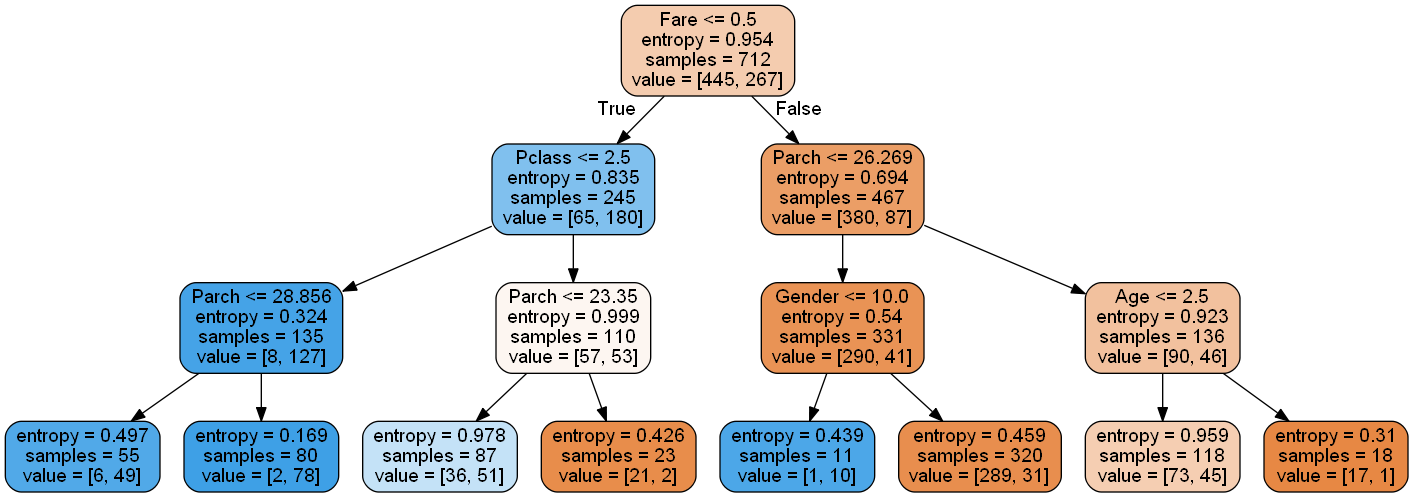

In [33]:
dot_data = tree.export_graphviz(rscv_grid.best_estimator_, out_file=None, filled=True, rounded=True,
                                feature_names=['Pclass', 'Gender', 'Age', 'SibSp', 'Parch', 'Fare'])
graph = pydotplus.graph_from_dot_data(dot_data)
display(Image(graph.create_png()))                 